# Multiclass Classification - a Simple Keras Model (MNIST)
Adapted from [Chollet notebook 2](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb).
Presented here in accordance with the MIT license.

The objectives of this notebooks are:
1. Get to know the Keras framework and how it corresponds to the Tensorflow API, specifically:
     * `keras.Sequential` - define a sequential model
     * `model.compile` - config the model, e.g. with losses and metrics
     * `model.fit` - train the model
     * `model.predict` - run inference with the model
     * `tf.keras.models.save_model`
2. `softmax` 
3. `sparse_categorical_crossentropy`

In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## Get the Data

* Here we will use [tensorflow.keras.datasets](https://keras.io/api/datasets/) as our data repository. It provides API access to a collection of a few toy datasets (in numpy format) that can be used to train and test simple models.
* [MNIST](https://keras.io/api/datasets/mnist/) is a dataset of 60,000 28x28 grayscale images of the 10 digits (0-9), along with a test set of 10,000 images.

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Data Exploration

In [33]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


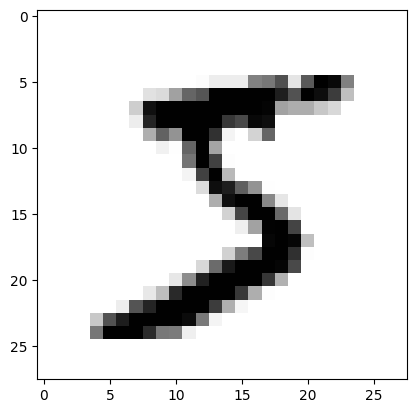

In [34]:
# plot the first image in the training set in grayscale
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='binary')  # to understand how a matrix of numbers is converted to an image, have a look at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

In [35]:
# print the label of the first image in the training set   
print(f'Label: {train_labels[1]}')

Label: 0


* To get familiar with the data, print out the first 5 images and labels in the training set and the first 5 images and labels in the test set
* Run the `imshow` below without the `cmap='gray'` argument, and see what happens
* What additional data explorations would you like to test, and what would be the motivation for each?
* What is the distribution of the labels in the training set? What is the distribution of the labels in the test set?
* What is the distribution of the pixel values in the training set? What is the distribution of the pixel values in the test set?

## Data preprocessing

In [36]:
train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [37]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


Notice that despite the normalization, the image is still the same (this is a matplotlib feature, to read more see imshow documentation):

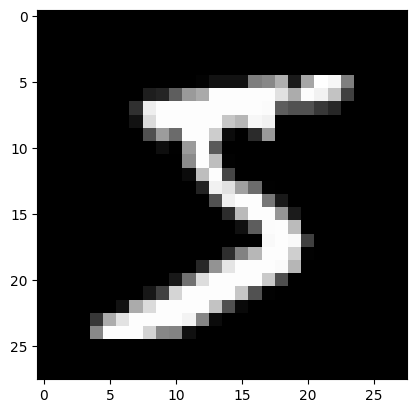

In [38]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

## Define the model
How many neurons does each layer have?

In [39]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

## Define the Loss Function, Optimizer and Metrics

In [41]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training ("Fitting") the model

In [42]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)  # 128*469 = 60000

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2640 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1085 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0721 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0513 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9880


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Inference: Using the Model to Make Predictions

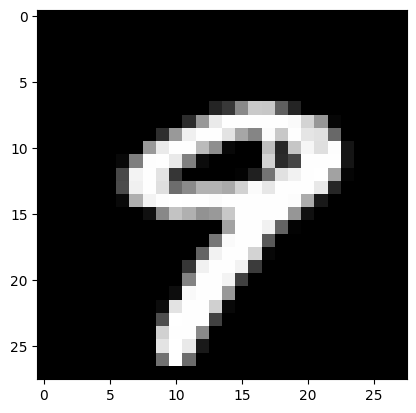

In [44]:
plt.imshow(test_images[9].reshape(28,28), cmap='gray')  # the actual image

In [45]:
# a note on shapes: the model expects a 2D array of shape (batch_size, input_dim), so we need to reshape the test image to (1, 784)
# Compare:
print(test_images[0].shape)  # this will result in an error if given as input to the model (since it is a 1d array)
print(test_images[0:1].shape)  # this is a correct shape (2d)

(784,)
(1, 784)


In [46]:
prediction = model.predict(test_images[9:10])  # the notation `[0:1]` is used to get the first element of the array, but in the desired shape of (None, 784). `None` in Tensorflow means any number of elements, and is used to indicate that the shape is dynamic (i.e. it can be any number of instances)  

1/1 [==============================] - 0s 56ms/step


In [47]:
prediction  # 10 classes, each with a probability

array([[2.7940018e-11, 1.9140262e-12, 2.5901083e-11, 2.2145038e-07,
        4.6619674e-04, 3.5868888e-09, 4.5968815e-12, 1.9610094e-04,
        1.3058386e-05, 9.9932444e-01]], dtype=float32)

In [48]:
prediction.argmax()  # the class with the highest probability

9

In [49]:
prediction[0, 9]  # the probability of the 9th class (of the zeroth data instance)

0.99932444

In [50]:
test_labels[9]  # the actual label


9

## Evaluating the Model with the Test Data

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9798
test_acc: 0.9797999858856201


## Saving the Model for Future Use
 This allows using the model for future inference, serving or re-training.

The recommended formats is `pb` (the default), since it allows loading the model by both Keras and Native Tensorflow. The `h5` format on the other hand can be loaded only with the Keras model (which is fine, if that's how it is used. Moreover, a model can always be loaded in an `h5` format, and then saved in the `pb` format).

A second choice one has to make is whether they you'd like to save the optimizer. The default saves it, and adding a flag can allow its removal. The benefit of saving the optimizer is if one is interested to continue the training from the same state of the optimizer (for instance, starting with the saved momentum, if it's a momentum-based optimizer). Training can still be done on a model without a saved optimizer, but this will be a 'fresh start'. Removing the optimizer is useful once the current training is done. An example would be when one exports the model for deployment, that is that the model will run predictions.

In [23]:
# Saving with Keras, default `.pb` format
tf.keras.models.save_model(model, '../models/mnist_model/keras_pb/')

INFO:tensorflow:Assets written to: ../models/mnist_model/keras_pb/assets


INFO:tensorflow:Assets written to: ../models/mnist_model/keras_pb/assets


In [21]:
# Saving with Keras, default `.pb` format, and without the optimizer
tf.keras.models.save_model(model, '../models/mnist_model/keras_pb_no_optimizer/', include_optimizer=False)

INFO:tensorflow:Assets written to: ../models/mnist_model/keras_pb_no_optimizer/assets


INFO:tensorflow:Assets written to: ../models/mnist_model/keras_pb_no_optimizer/assets


In [22]:
# Saving with Keras an h5
tf.keras.models.save_model(model, '../models/mnist_model/keras_h5/model.h5', save_format='h5')

In [23]:
# Saving with Tensorflow
tf.saved_model.save(model, '../models/mnist_model/tf/')

INFO:tensorflow:Assets written to: ../models/mnist_model/tf/assets


INFO:tensorflow:Assets written to: ../models/mnist_model/tf/assets
